# Stopnja kriminala v Sloveniji po letih v korelaciji z ostalimi podatki

Podatkovno Rudarjenje, 2022/23

**Sašo Primožič, Ambrož Perovšek, Andraž Adamič, Matija Ječnik**

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [197]:
kd2010 = pd.read_csv("podatki/kd2010.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2011 = pd.read_csv("podatki/kd2011.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2012 = pd.read_csv("podatki/kd2012.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2013 = pd.read_csv("podatki/kd2013.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2014 = pd.read_csv("podatki/kd2014.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2015 = pd.read_csv("podatki/kd2015.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2016 = pd.read_csv("podatki/kd2016.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2017 = pd.read_csv("podatki/kd2017.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2018 = pd.read_csv("podatki/kd2018.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2019 = pd.read_csv("podatki/kd2019.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd = pd.concat([kd2010, kd2011, kd2012, kd2013, kd2014, kd2015, kd2016, kd2017, kd2018, kd2019], names=['letoVnosa'], keys=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',])
# kd = kd.drop("ZaporednaStevilkaKD", axis="columns")

/var/folders/br/95vqnhjn3db21qqd2rk3lt3r0000gn/T/ipykernel_73672/969793939.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  kd2013 = pd.read_csv("podatki/kd2013.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
/var/folders/br/95vqnhjn3db21qqd2rk3lt3r0000gn/T/ipykernel_73672/969793939.py:7: DtypeWarning: Columns (14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  kd2016 = pd.read_csv("podatki/kd2016.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})


In [198]:
kd['MesecStoritve'] = pd.to_datetime(kd['MesecStoritve'], format='%m.%Y', exact=True)
kd = kd.rename(columns={'MesecStoritve': 'datumStoritve'})
kd.sort_values(by=['datumStoritve', 'UraStoritve'], inplace=True)
# kd.reset_index(drop=True, inplace=True)

<BarContainer object of 7 artists>

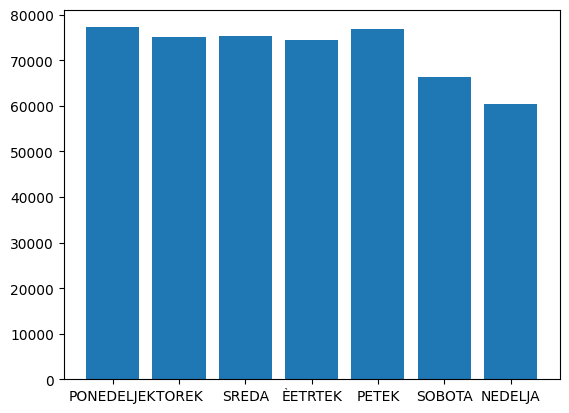

In [130]:
# print(kd[1:10])

dnevi = {}
for dan in ['PONEDELJEK', 'TOREK', 'SREDA', 'ÈETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA']:
    dnevi[dan] = np.unique(np.asarray(kd.loc[kd['DanVTednu'] == dan, ['ZaporednaStevilkaKD']]))
# dnevi['SREDA'].size
plt.bar(dnevi.keys(), [d.size for d in dnevi.values()])

<BarContainer object of 10 artists>

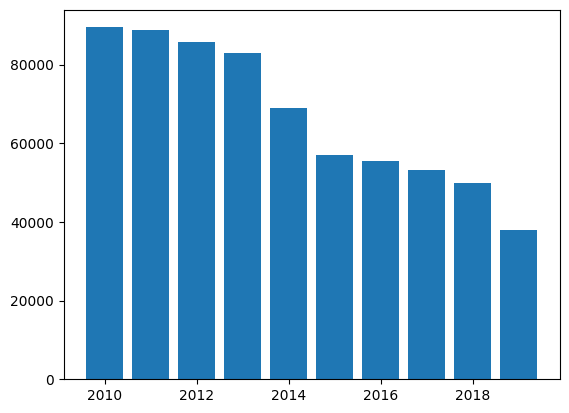

In [163]:
dan = []
for datum in range(2010, 2020):
    dan.append(np.unique(np.asarray(kd.loc[(kd['datumStoritve'] > str(datum) + '-01-01') & (kd['datumStoritve'] < str(datum + 1) + '-01-01'), ['ZaporednaStevilkaKD']])).size)

plt.bar(range(2010, 2020), dan)

<BarContainer object of 2 artists>

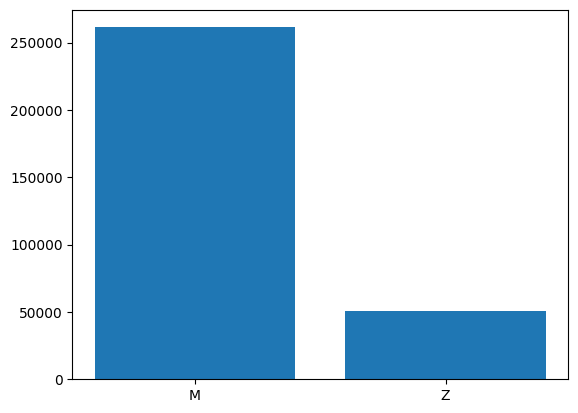

In [201]:
plt.bar(['M', 'Z'], [kd.query("Spol == 'MO\x8aKI' & (VrstaOsebe == 'NEOVADENI OSUMLJENEC (ARHIV)' | VrstaOsebe == 'OVADENI OSUMLJENEC')")['Spol'].size, kd.query("Spol == '\x8eENSKI' & (VrstaOsebe == 'NEOVADENI OSUMLJENEC (ARHIV)' | VrstaOsebe == 'OVADENI OSUMLJENEC')")['Spol'].size])
# kd['VrstaOsebe'].unique()
# np.unique(np.asarray(kd.loc[(kd['Spol'] == 'MO\x8aKI'), ['ZaporednaStevilkaKD']])).size


In [199]:
kd.dtypes

ZaporednaStevilkaKD                    int64
datumStoritve                 datetime64[ns]
UraStoritve                           object
DanVTednu                             object
PUStoritveKD                          object
Povratnik                             object
OpisKD                                object
PoglavjeKD                            object
GospodarskiKriminal                   object
OrganiziranKriminal                   object
MladoletniskaKriminaliteta            object
Poskus                                object
KriminalisticnaOznacba1               object
KriminalisticnaOznacba2               object
KriminalisticnaOznacba3               object
UporabljenoSredstvo1                  object
UporabljenoSredstvo2                  object
UporabljenoSredstvo3                  object
UporabljenoSredstvo4                  object
UpravnaEnotaStoritve                  object
OpisKraja                             object
LetoZakljucnegaDokumenta               int64
VrstaZaklj